<a href="https://colab.research.google.com/github/ByeonJaeseong/DeepLearningProject/blob/main/grade_cut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import tensorflow as tf
from tensorflow import keras
uploaded = files.upload()

Saving grade_cut.cell to grade_cut.cell
Saving grade_cut_modi.cell to grade_cut_modi.cell
Saving percentage_of_correct_answers.cell to percentage_of_correct_answers.cell
Saving percentage_of_correct_answers_modi.cell to percentage_of_correct_answers_modi.cell


In [2]:
# 데이터 업로드
df_data = pd.read_excel('percentage_of_correct_answers_modi.cell', index_col=0)
df_data.head()
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,...,291.00000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,91.701031,94.343643,90.453608,88.941581,91.017182,86.257732,84.962199,82.965636,84.632302,80.271478,...,43.00000,86.199313,81.195876,74.845361,69.333333,56.068729,45.793814,40.134021,25.408935,14.151203
std,4.023633,44.084231,4.640944,5.302572,47.212393,7.369946,8.006158,8.630271,46.971512,9.282084,...,12.87687,6.220223,10.723136,12.499109,13.544393,17.522855,18.726860,16.768379,15.211196,12.725666
min,71.000000,77.000000,66.000000,66.000000,58.000000,56.000000,33.000000,38.000000,54.000000,50.000000,...,12.00000,58.000000,32.000000,29.000000,22.000000,8.000000,3.000000,7.000000,4.000000,0.000000
25%,90.000000,90.000000,88.000000,87.000000,86.000000,84.000000,82.000000,79.000000,78.000000,77.000000,...,34.00000,83.000000,77.000000,68.500000,60.500000,45.000000,32.000000,27.000000,14.000000,6.000000
50%,92.000000,93.000000,92.000000,90.000000,89.000000,88.000000,87.000000,85.000000,84.000000,82.000000,...,42.00000,88.000000,84.000000,78.000000,71.000000,59.000000,46.000000,39.000000,22.000000,10.000000
75%,95.000000,94.500000,94.000000,92.000000,92.000000,91.000000,90.500000,89.000000,88.000000,87.000000,...,51.00000,91.000000,89.000000,84.000000,80.000000,69.000000,61.000000,51.500000,34.000000,18.000000
max,98.000000,841.000000,98.000000,97.000000,888.000000,97.000000,96.000000,96.000000,870.000000,96.000000,...,84.00000,96.000000,95.000000,94.000000,92.000000,89.000000,87.000000,82.000000,79.000000,100.000000


In [3]:
# 타겟 데이터 업로드
df_target = pd.read_excel('grade_cut_modi.cell', index_col=0)
df_target.head()



,0,1,2,3,4,5,6,7,8
0,151,138,128,118,103,89,81,79,75
1,158,138,128,118,103,89,81,79,75
2,157,138,128,118,103,89,81,79,75
3,145,133,126,119,107,91,80,76,72
4,145,133,126,119,107,91,80,76,72


In [4]:
df_main = pd.concat([df_data, df_target], axis=1) # concatenate # data 합치기
df_main.head()

,0,1,2,3,4,5,6,7,8,9,...,29,0,1,2,3,4,5,6,7,8
0,85,90,78,87,70,64,91,64,73,89,...,1,151,138,128,118,103,89,81,79,75
1,95,96,93,96,87,79,94,84,88,82,...,7,158,138,128,118,103,89,81,79,75
2,89,91,84,88,78,74,89,75,80,80,...,6,157,138,128,118,103,89,81,79,75
3,82,80,79,85,80,60,82,80,60,77,...,5,145,133,126,119,107,91,80,76,72
4,95,95,95,89,95,81,78,95,84,87,...,10,145,133,126,119,107,91,80,76,72


In [5]:
percentage_data = np.array(df_data)
grade_cut = np.array(df_target)
pd.DataFrame(percentage_data)
data_X = percentage_data[:]
data_Y = grade_cut[:]
print(data_X[0].shape)
print(data_X)
print(data_Y.shape)
print(data_Y)


(30,)
[[85 90 78 ... 38 16  1]
 [95 96 93 ... 31  8  7]
 [89 91 84 ... 33 15  6]
 ...
 [85 86 85 ... 42 63  7]
 [89 90 90 ... 74 50 33]
 [87 82 85 ... 40 26 48]]
(291, 9)
[[151 138 128 ...  81  79  75]
 [158 138 128 ...  81  79  75]
 [157 138 128 ...  81  79  75]
 ...
 [155 141 129 ...  83  78  74]
 [141 138 130 ...  82  76  73]
 [156 141 127 ...  83  78  72]]


In [6]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(percentage_data, grade_cut, test_size=0.2, random_state=42)
X_valid=x_train[:59]
Y_valid=y_train[:59]
X_train=x_train[59:]
Y_train=y_train[59:]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(232, 30)
(59, 30)
(232, 9)
(59, 9)


In [7]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
##        tf.cast(y_pred|y_true, tf.float32|tf.float32)
        y_true = tf.cast(y_true, tf.float32)
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error)/2
        linear_loss = self.threshold*tf.abs(error) - self.threshold**2/2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return{**base_config, "threshold":self.threshold}    

In [24]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
initializer = tf.keras.initializers.Identity()

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[30,], Huberloss=7):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="selu"))
    model.add(keras.layers.Dense(9, kernel_initializer=initializer))
    optimizer = keras.optimizers.Nadam(learning_rate=learning_rate)
    model.compile(loss=HuberLoss(Huberloss), optimizer=optimizer)
    return model


In [25]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<ipython-input-25-651c14c6d32f>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [28]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
initializer = tf.keras.initializers.Identity()


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_vaild = scaler.transform(X_valid)
x_test = scaler.transform(x_test)

param_distribs = {
    "n_hidden":np.arange(0, 5),
    "n_neurons":np.arange(1,100),
    "learning_rate":reciprocal(3e-5,3e-2),
    "Huberloss":np.arange(1,15)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=500, cv=3)
rnd_search_cv.fit(X_train, Y_train, epochs=700, validation_data=(X_valid, Y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=20)])




# model = keras.models.Sequential([keras.layers.InputLayer(input_shape = [30,]),
# keras.layers.Dropout(rate=0.3),                               
# keras.layers.Dense(80, activation = "selu"),
# keras.layers.BatchNormalization(),
# keras.layers.Dropout(rate=0.3),
# keras.layers.Dense(5, activation = "selu"),
# ##keras.layers.Dense(2, activation = "selu"),
# keras.layers.Dense(9, kernel_initializer=initializer)
# ])
# model.compile(loss=HuberLoss(10), optimizer = keras.optimizers.Nadam(learning_rate=0.0005), metrics=['accuracy'])

# history = model.fit(X_train, Y_train, epochs = 700, validation_data = (X_valid, Y_valid))
# mse_test = model.evaluate(x_test, y_test)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 16/700
4/4 [==============================] - 0s 32ms/step - loss: 1291.9022 - val_loss: 415.6151
Epoch 17/700
4/4 [==============================] - 0s 24ms/step - loss: 1291.6033 - val_loss: 469.4746
Epoch 18/700
4/4 [==============================] - 0s 31ms/step - loss: 1291.3138 - val_loss: 526.9614
Epoch 19/700
4/4 [==============================] - 0s 36ms/step - loss: 1291.0479 - val_loss: 585.3876
Epoch 20/700
4/4 [==============================] - 0s 30ms/step - loss: 1290.7460 - val_loss: 630.7484
Epoch 21/700
4/4 [==============================] - 0s 30ms/step - loss: 1290.4755 - val_loss: 687.8549
Epoch 22/700
4/4 [==============================] - 0s 21ms/step - loss: 1290.1558 - val_loss: 739.2261
Epoch 23/700
4/4 [==============================] - 0s 35ms/step - loss: 1289.8777 - val_loss: 784.6235
Epoch 24/700
4/4 [==============================] - 0s 34ms/step - loss: 1289.6332 - val_loss: 841.5523
Epoch 25/700
4/4 [==========

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f5be8d5af10>,
                   n_iter=500,
                   param_distributions={'Huberloss': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f5bc8b64b50>,
                                        'n_hidden': array([0, 1, 2, 3, 4]),
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [29]:
rnd_search_cv.best_params_

{'Huberloss': 1,
 'learning_rate': 0.022581069891024586,
 'n_hidden': 3,
 'n_neurons': 33}

In [34]:
model = keras.models.Sequential([keras.layers.InputLayer(input_shape = [30,]),
keras.layers.Dropout(rate=0.3),                               
keras.layers.Dense(33, activation = "selu"),
keras.layers.Dense(33, activation = "selu"),
keras.layers.Dense(33, activation = "selu"),
keras.layers.Dense(9, kernel_initializer=initializer)
])
model.compile(loss=HuberLoss(1), optimizer = keras.optimizers.Nadam(learning_rate=0.022581069891024586,), metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 700, validation_data = (X_valid, Y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=20)])
mse_test = model.evaluate(x_test, y_test)


Epoch 1/700
6/6 [==============================] - 3s 67ms/step - loss: 104.4857 - accuracy: 0.0405 - val_loss: 712.9058 - val_accuracy: 0.0000e+00
Epoch 2/700
6/6 [==============================] - 0s 16ms/step - loss: 67.7519 - accuracy: 0.0694 - val_loss: 8317.9053 - val_accuracy: 1.0000
Epoch 3/700
6/6 [==============================] - 0s 17ms/step - loss: 49.2946 - accuracy: 0.4913 - val_loss: 3262.5334 - val_accuracy: 1.0000
Epoch 4/700
6/6 [==============================] - 0s 18ms/step - loss: 34.7868 - accuracy: 0.9711 - val_loss: 1183.0684 - val_accuracy: 1.0000
Epoch 5/700
6/6 [==============================] - 0s 14ms/step - loss: 24.8313 - accuracy: 0.9769 - val_loss: 764.7717 - val_accuracy: 1.0000
Epoch 6/700
6/6 [==============================] - 0s 14ms/step - loss: 17.8025 - accuracy: 0.9884 - val_loss: 161.5143 - val_accuracy: 0.9831
Epoch 7/700
6/6 [==============================] - 0s 18ms/step - loss: 12.0235 - accuracy: 0.9942 - val_loss: 110.9460 - val_accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

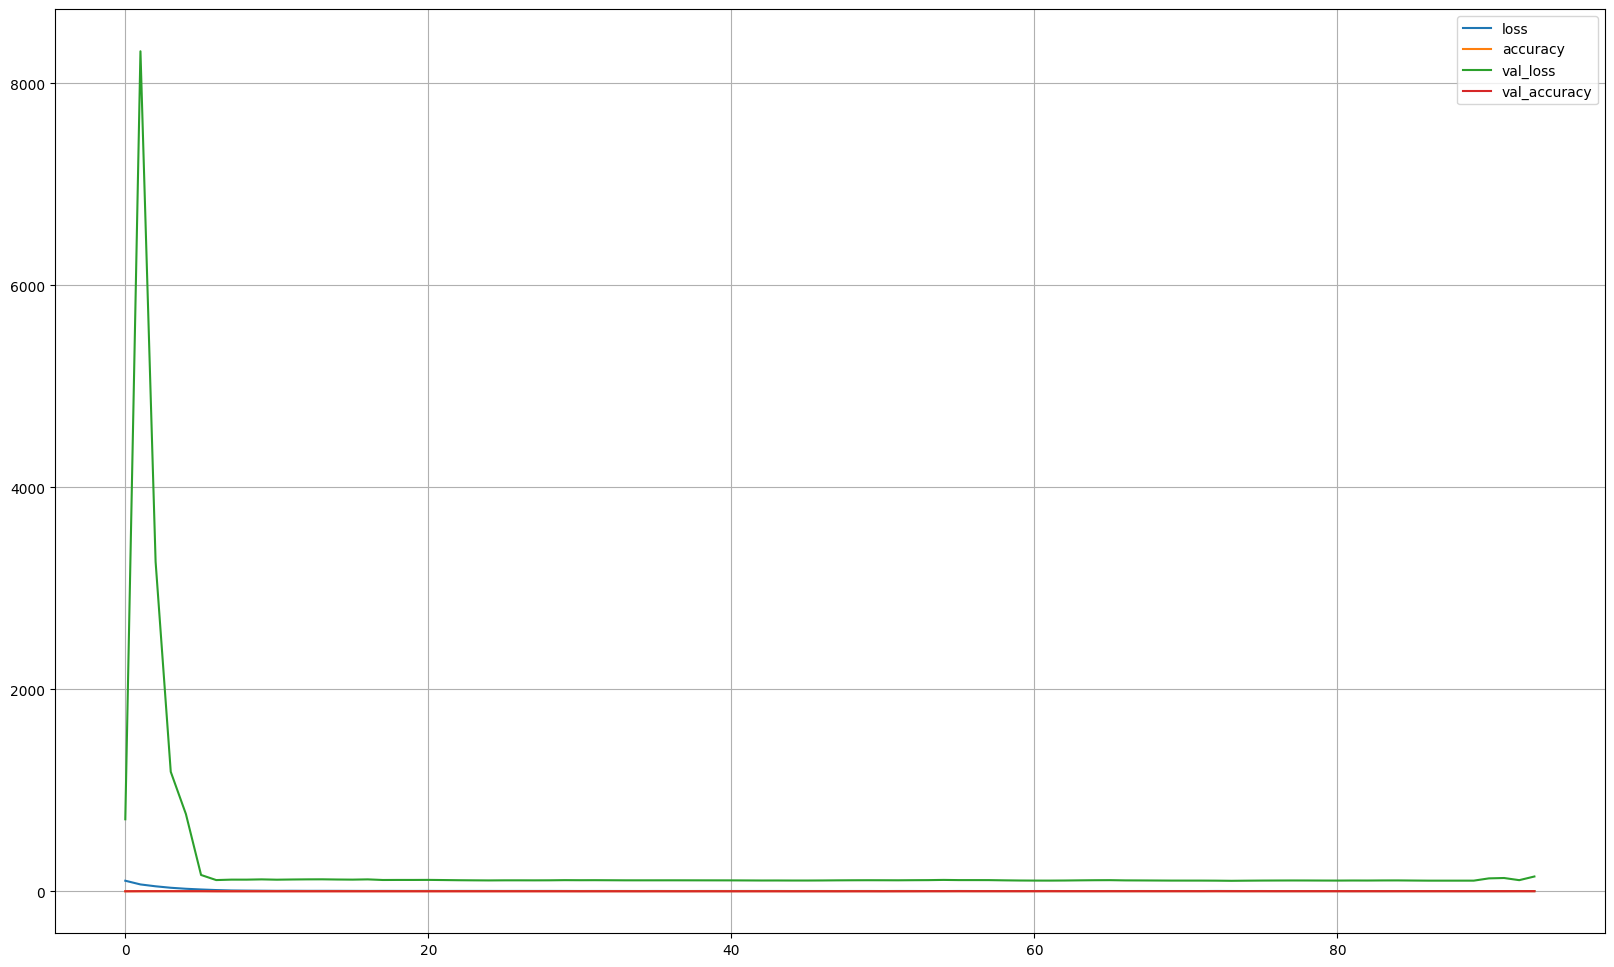

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(20, 12))
plt.grid(True)
plt.show

In [ ]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 24.4819


24.481895446777344

In [36]:
x_new = x_test[:20]
y_pred = model.predict(x_new)
print(y_pred.round(0))
print( )
print(y_test[:20])
print()
print(y_pred.round(0)-y_test[:20])

1/1 [==============================] - 0s 150ms/step
[[141. 132. 127. 119. 110.  95.  81.  75.  70.]
 [150. 138. 129. 118. 107.  93.  82.  77.  74.]
 [146. 135. 128. 118. 107.  93.  82.  77.  72.]
 [150. 138. 130. 120. 108.  92.  82.  78.  75.]
 [150. 141. 132. 119. 105.  91.  83.  80.  77.]
 [144. 137. 129. 119. 107.  93.  82.  77.  73.]
 [161. 146. 132. 118. 104.  92.  85.  82.  78.]
 [127. 125. 122. 119. 112. 101.  83.  69.  62.]
 [156. 140. 129. 118. 105.  92.  83.  79.  76.]
 [146. 136. 128. 118. 106.  92.  81.  76.  73.]
 [141. 135. 129. 119. 108.  95.  82.  76.  72.]
 [158. 144. 132. 118. 104.  92.  84.  81.  78.]
 [153. 139. 130. 119. 107.  92.  83.  78.  76.]
 [163. 144. 130. 116. 102.  91.  85.  80.  77.]
 [153. 141. 132. 121. 109.  95.  84.  79.  76.]
 [136. 129. 125. 118. 110.  97.  82.  73.  67.]
 [145. 136. 130. 119. 107.  93.  82.  77.  74.]
 [150. 138. 129. 119. 108.  94.  83.  78.  74.]
 [166. 147. 134. 118. 104.  93.  87.  83.  80.]
 [150. 139. 130. 119. 107.  92.  83